In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import cv2

In [13]:
# Create generators
trains_data = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize the data
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

trains_data = trains_data.map(process)
validation_data = validation_data.map(process)

In [15]:
# Create CNN model
model = Sequential()


# 32
model.add(Conv2D(32, kernel_size=(3, 3),
                padding='valid' ,
                activation='relu', 
                input_shape=(256, 256, 3)))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), 
                    strides=2, 
                    padding='valid'))

# 64
model.add(Conv2D(64, kernel_size=(3, 3),
                padding='valid' ,
                activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), 
                    strides=2, 
                    padding='valid'))

# 128
model.add(Conv2D(128, kernel_size=(3, 3),
                padding='valid' ,
                activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), 
                    strides=2, 
                    padding='valid'))

model.add(Flatten())

# 128
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 64
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# 1
model.add(Dense(1, activation='sigmoid'))

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(trains_data, epochs=9, validation_data=validation_data)

Epoch 1/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.5714 - loss: 2.2956 - val_accuracy: 0.6644 - val_loss: 0.6182
Epoch 2/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 635s 1s/step - accuracy: 0.6441 - loss: 0.6720 - val_accuracy: 0.7564 - val_loss: 0.5073
Epoch 3/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 625s 1000ms/step - accuracy: 0.7526 - loss: 0.5107 - val_accuracy: 0.7896 - val_loss: 0.4562
Epoch 4/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 613s 981ms/step - accuracy: 0.8045 - loss: 0.4286 - val_accuracy: 0.7688 - val_loss: 0.5251
Epoch 5/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 605s 968ms/step - accuracy: 0.8364 - loss: 0.3765 - val_accuracy: 0.8048 - val_loss: 0.4440
Epoch 6/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 599s 958ms/step - accuracy: 0.8559 - loss: 0.3260 - val_accuracy: 0.7730 - val_loss: 0.5678
Epoch 7/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 600s 960ms/step - accuracy: 0.8988 - loss: 0.2456 - val_accuracy: 0.7768 - val_loss: 0.6239
Epoch 8/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 604s 966ms/step - accuracy: 0.9364 - loss: 0.1649

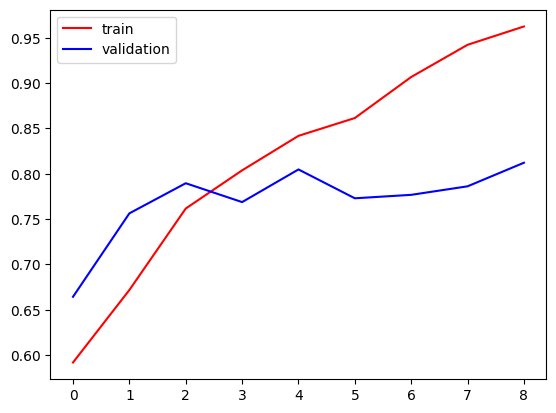

In [21]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

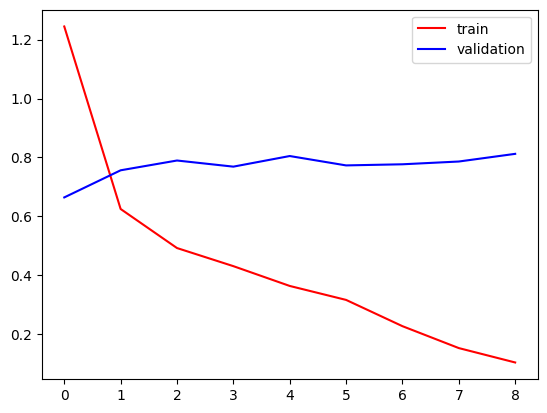

In [22]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

# Test (Cat)

(499, 489, 3)

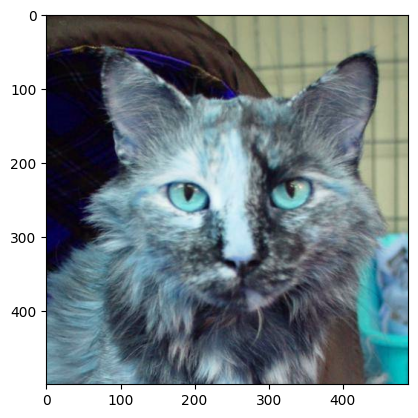

In [25]:
test_img = cv2.imread('./test/cats/cat.10.jpg')
plt.imshow(test_img)
test_img.shape

In [26]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [27]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.]], dtype=float32)

# Test (Dog)

(397, 500, 3)

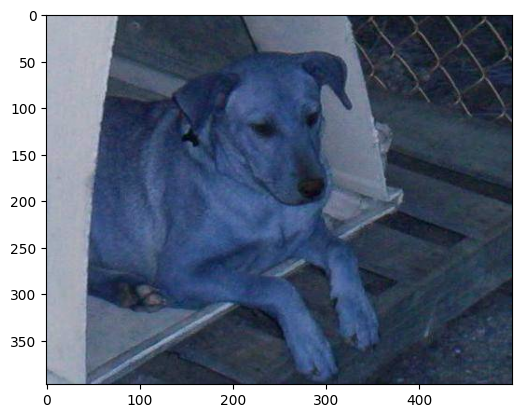

In [31]:
test_img = cv2.imread('./test/dogs/dog.100.jpg')
plt.imshow(test_img)
test_img.shape

In [32]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.]], dtype=float32)